In [3]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target


In [4]:
# (2) 모델에 입력할 데이터 X 준비하기
X = np.array(df_X)

In [5]:
# (3) 모델에 예측할 데이터 y 준비하기
y = np.array(df_y)

In [6]:
# (4) train 데이터와 test 데이터로 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# (5) 모델 준비하기
# 가중치(W)와 편향(b) 초기화
W = np.zeros(X_train.shape[1])
b = 0.0


def model(X, W, b):
    predictions = 0
    for i in range(X.shape[1]): 
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [8]:
# (6) 손실함수 loss 정의하기
def MSE(y_true, y_pred):
    mse = ((y_true - y_pred) ** 2).mean()  
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    return MSE(y, predictions)

In [9]:
# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, y, y_pred):
    N = len(y)
    dW = -2 / N * np.dot(X.T, (y - y_pred))
    db = -2 / N * np.sum(y - y_pred)
    return dW, db

In [10]:
# (8) 하이퍼 파라미터인 학습률 설정하기
learning_rate = 0.1
epochs = 10000  # 반복 횟수

In [11]:
# (9) 모델 학습하기
for epoch in range(epochs):
    y_pred = model(X_train, W, b)  
    dW, db = gradient(X_train, y_train, y_pred)  
    
    # 가중치와 편향 업데이트
    W -= learning_rate * dW
    b -= learning_rate * db
    
    # 손실값 계산 및 출력
    if epoch % 100 == 0:
        current_loss = loss(X_train, W, b, y_train)  
        print(f"Epoch {epoch}: Loss = {current_loss}")

Epoch 0: Loss = 21193.179569002026
Epoch 100: Loss = 5379.99857252262
Epoch 200: Loss = 4877.101510383119
Epoch 300: Loss = 4503.218756307907
Epoch 400: Loss = 4221.562870030017
Epoch 500: Loss = 4006.254662974612
Epoch 600: Loss = 3839.0442332700277
Epoch 700: Loss = 3707.022320713319
Epoch 800: Loss = 3601.0223841930806
Epoch 900: Loss = 3514.5044942424843
Epoch 1000: Loss = 3442.775365061437
Epoch 1100: Loss = 3382.442937864629
Epoch 1200: Loss = 3331.034667498475
Epoch 1300: Loss = 3286.730098367415
Epoch 1400: Loss = 3248.1732615011706
Epoch 1500: Loss = 3214.340846566144
Epoch 1600: Loss = 3184.44937042177
Epoch 1700: Loss = 3157.889632372209
Epoch 1800: Loss = 3134.180281350669
Epoch 1900: Loss = 3112.9347860952576
Epoch 2000: Loss = 3093.837819582294
Epoch 2100: Loss = 3076.6282692361074
Epoch 2200: Loss = 3061.086922075333
Epoch 2300: Loss = 3047.0274586935643
Epoch 2400: Loss = 3034.2897983054345
Epoch 2500: Loss = 3022.7351223611563
Epoch 2600: Loss = 3012.2421036420333
Epoc

In [12]:
# (10) test 데이터에 대한 성능 확인하기
test_loss = loss(X_test, W, b, y_test)
y_test_pred = model(X_test, W, b)

print(f"Test Loss: {test_loss}")

Test Loss: 2880.1972555107764


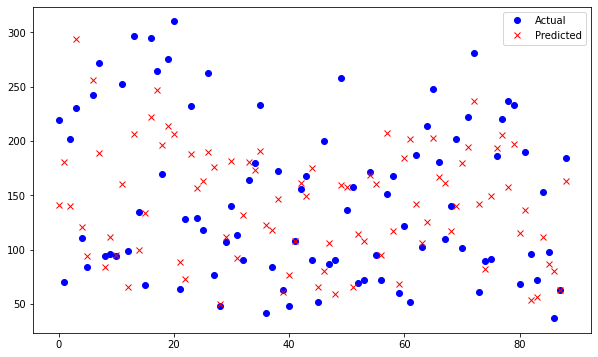

In [13]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o', linestyle='', color='blue')  # 실제 값
plt.plot(y_test_pred, label='Predicted', marker='x', linestyle='', color='red')  # 예측 값
plt.legend()
plt.show()
